# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [81]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [83]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [84]:
# Rename all the columns to lower case
df.columns = df.columns.map(str.lower)

In [85]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   c/a                                                                   197625 non-null  object
 1   unit                                                                  197625 non-null  object
 2   scp                                                                   197625 non-null  object
 3   station                                                               197625 non-null  object
 4   linename                                                              197625 non-null  object
 5   division                                                              197625 non-null  object
 6   date                                                                  197625 non-null  objec

In [87]:
print(df.columns)

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')


In [88]:
# Change the index to 'linename'
df.index.name='linename'

In [89]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Reset the index: 

In [90]:
# Reset the index
df.reset_index(drop=True)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [91]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [92]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].apply(lambda x: len(x))
df_sorted = df.sort_values(by='Num_Lines', ascending=False)
print(df_sorted)

            c/a  unit       scp         station      linename division  \
linename                                                                 
132292     R151  R033  00-00-00  TIMES SQ-42 ST  1237ACENQRSW      IRT   
2686       A021  R032  01-00-01  TIMES SQ-42 ST  ACENQRS1237W      BMT   
2673       A021  R032  01-00-01  TIMES SQ-42 ST  ACENQRS1237W      BMT   
2674       A021  R032  01-00-01  TIMES SQ-42 ST  ACENQRS1237W      BMT   
2675       A021  R032  01-00-01  TIMES SQ-42 ST  ACENQRS1237W      BMT   
...         ...   ...       ...             ...           ...      ...   
112565    PTH04  R551  00-04-05    GROVE STREET             1      PTH   
112564    PTH04  R551  00-04-05    GROVE STREET             1      PTH   
112563    PTH04  R551  00-04-05    GROVE STREET             1      PTH   
112562    PTH04  R551  00-04-05    GROVE STREET             1      PTH   
197624    TRAM2  R469  00-05-01   RIT-ROOSEVELT             R      RIT   

                date      time     de

Write a function to clean column names: 

In [93]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [94]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = None
    return cleaned

In [95]:
# Use the above function to clean the column names
def clean(col_name):
     # Clean the column name in any way you want to. Hint: think back to str methods
    cleaned =(
        col_name.strip()               # Remove leading/trailing whitespace
        .lower()                       # Convert to lowercase
        .replace(' ', '_')             # Replace spaces with underscores
        .replace('-', '_')             # Replace dashes with underscores
        .replace('/', '_')             # Replace slashes with underscores
    )
    return cleaned

In [96]:
# Check to ensure the column names were cleaned
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [97]:
df['date'] = pd.to_datetime(df['date'])
df['date']

linename
0        2018-08-25
1        2018-08-25
2        2018-08-25
3        2018-08-25
4        2018-08-25
            ...    
197620   2018-08-31
197621   2018-08-31
197622   2018-08-31
197623   2018-08-31
197624   2018-08-31
Name: date, Length: 197625, dtype: datetime64[ns]

In [98]:
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week']

linename
0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
197620      Friday
197621      Friday
197622      Friday
197623      Friday
197624      Friday
Name: day_of_week, Length: 197625, dtype: object

In [99]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])
# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

print(df['date'])
print(df['day_of_week'])

linename
0        2018-08-25
1        2018-08-25
2        2018-08-25
3        2018-08-25
4        2018-08-25
            ...    
197620   2018-08-31
197621   2018-08-31
197622   2018-08-31
197623   2018-08-31
197624   2018-08-31
Name: date, Length: 197625, dtype: datetime64[ns]
linename
0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
197620      Friday
197621      Friday
197622      Friday
197623      Friday
197624      Friday
Name: day_of_week, Length: 197625, dtype: object


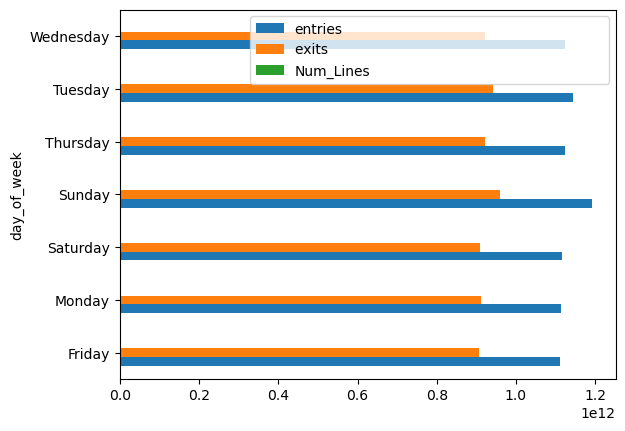

In [100]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [101]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines,day_of_week
linename,,,,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


In [102]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines,day_of_week
linename,,,,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [103]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [104]:
print(df.index)

RangeIndex(start=0, stop=197625, step=1, name='linename')


In [105]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines', 'day_of_week'],
      dtype='object')

In [106]:
df['is_weekend'] = df['date'].dt.dayofweek >= 5  # 5 (Saturday), 6 (Sunday)

In [107]:
numeric_cols = ['entries', 'exits', 'Num_Lines']

In [108]:
print(df.columns.tolist())

['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time', 'desc', 'entries', 'exits                                                               ', 'Num_Lines', 'day_of_week', 'is_weekend']


In [109]:
df.columns = df.columns.str.strip()

In [110]:
numeric_cols = ['entries', 'exits', 'Num_Lines']  # Adjust the list if needed
missing_cols = [col for col in numeric_cols if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")

In [111]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

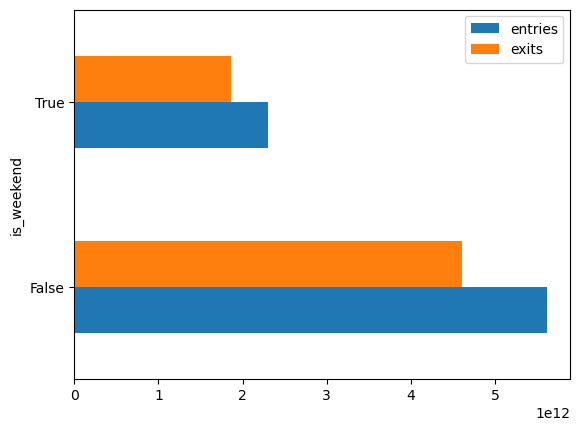

In [112]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend =df.groupby('is_weekend')[numeric_cols].sum()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [113]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns=['c/a', 'scp'])
df.head(2)

,unit,station,linename,division,date,time,desc,entries,exits,Num_Lines,day_of_week,is_weekend
linename,,,,,,,,,,,,
0,R051,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday,True
1,R051,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday,True


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [115]:
# Your answer here 
"""
The fact that in the plot of the day of the week there are high rates of entry and exit but according to the second plot the entry and exit aon the weekend are more false than true
"""

'\nThe fact that in the plot of the day of the week there are high rates of entry and exit but according to the second plot the entry and exit aon the weekend are more false than true\n'

## Summary

You practiced your data cleanup skills using Pandas.